In [1]:
import pandas as pd
import numpy as np
import os
from alignment_helper_fns import textgridpath_to_phonedf, get_all_textgrids_in_directory

In [20]:
df = pd.read_csv('./for_yan.csv')
phonation_dataset_path = '/home/prad/datasets/phonation_data'

estimated_tgs = get_all_textgrids_in_directory('./results/phonation_baseline_frame')
estimated_phone_dfs = [textgridpath_to_phonedf(tgpath, phone_key='phones', replace_silence=False) for tgpath in estimated_tgs]
audio_paths = [os.path.join(phonation_dataset_path, tgname.split('/')[-1][:-8]+'wav') for tgname in estimated_tgs]

Extracting all textgrids in directory:	 ./results/phonation_baseline_frame


1it [00:00, 1233.98it/s]


In [63]:
df.shape

(240, 59)

In [3]:
from phonation_dataset import *
tg_dir = phonation_dataset_path+'/extracted_manual_textgrids'
PhonationDataset(audio_paths=audio_paths, lables_df=df, textgrids_dir=tg_dir)

Loading audio files


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 1294.31it/s]



Extracting transcripts, phone and word bounds


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 3104154.50it/s]


Extracting Framewise Labels


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:02<00:00, 60.17it/s]


In [5]:
tdf = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
# list(tdf[idx].to_records(index=False))
df.columns

Index(['sessionStepId', 'session.sessionId', 'steps.stepId', 'steps.filePath',
       'steps.stepCategory', 'steps.prompt', 'start_time_groundtruth',
       'end_time_groundtruth', 'session.sessionScriptId', 'steps.name',
       'steps.sequenceNumber', 'steps.elicitType', 'session.language',
       'sessionId', 'stepId', 'RatePhonationStepMaxVoicedDuration',
       'RatePhonationStepMaxVoicedDurationNoAmbient',
       'RatePhonationStepPauseCount', 'RatePhonationStepPauseCountNoAmbient',
       'RatePhonationStepPauseMean', 'RatePhonationStepPauseMeanNoAmbient',
       'RatePhonationStepPausePercent',
       'RatePhonationStepPausePercentNoAmbient',
       'RatePhonationStepSpeechEndTime',
       'RatePhonationStepSpeechEndTimeNoAmbient',
       'RatePhonationStepSpeechStartTime',
       'RatePhonationStepSpeechStartTimeNoAmbient',
       'RatePhonationStepSpeechTotalDuration',
       'RatePhonationStepSpeechTotalDurationNoAmbient',
       'RatePhonationStepTotalVoicedDuration',
      

In [5]:
from phonation_dataset import *
# PhonationDataset(audio_paths=audio_paths, lables_df=df, textgrids_dir='/home/prad/datasets/phonation_data/extracted_manual_textgrids')

In [7]:
def get_startend_from_audiopath(audiopath, datadf):
    sessid = audiopath.split('/')[-1][:-4]
    return get_startend_time_from_sessid(sessid, datadf)
def get_startend_time_from_sessid(sessid, datadf, sessid_key='sessionStepId'):
    # sess_index = 
    row = datadf.iloc[np.argwhere(sessid==datadf[sessid_key].values).ravel()]
    return float(row['start_time_groundtruth']), float(row['end_time_groundtruth'])
    
# print(df.iloc[np.argwhere(audio_paths[idx].split('/')[-1][:-4]==df['sessionStepId'].values).ravel()])
get_startend_from_audiopath(audio_paths[idx], datadf=df)

(0.26191, 21.54974)

In [16]:
idxs = list(np.argwhere(df['RatePhonationStepPauseCount'].values!=0))

In [21]:
 
phonation_dataset_path = '/home/prad/datasets/phonation_data'
df['steps.filePath'] = [os.path.join(phonation_dataset_path, filename.split('/')[-1]) for filename in df['steps.filePath']]
pause_colname = 'RatePhonationStepPauseCount'
print(sum(df['RatePhonationStepPauseCount']==0.))
print(sum(df['RatePhonationStepPauseCount']==1.))
print(df.shape)
end_time_key = 'RatePhonationStepSpeechEndTimeNoAmbient'
start_time_key = 'RatePhonationStepSpeechStartTime'


idx = 30
estimated_tgs = get_all_textgrids_in_directory('./results/phonation_baseline_frame')
idx = int(np.argwhere(['1042-20171216-0947-7' in tg for tg in estimated_tgs]))
print(idx)
estimated_phone_dfs = [textgridpath_to_phonedf(tgpath, phone_key='phones', replace_silence=False) for tgpath in estimated_tgs]
audio_paths = [os.path.join(phonation_dataset_path, tgname.split('/')[-1][:-8]+'wav') for tgname in estimated_tgs]
print('Num Pauses:', df['RatePhonationStepPauseCount'][idx])
print(estimated_tgs[idx])
print(get_startend_from_audiopath(audio_paths[idx], datadf=df))
print(audio_paths[idx])
print(estimated_phone_dfs[idx])
# print(df[np.argwhere(audio_paths[idx].split('/')[-1][:-3] in df['sessionStepId'])])


170
38
(240, 59)
Extracting all textgrids in directory:	 ./results/phonation_baseline_frame


1it [00:00, 593.67it/s]

106
Num Pauses: 0.0
./results/phonation_baseline_frame/1042-20171216-0947-7.TextGrid
(0.51795, 12.29527)
/home/prad/datasets/phonation_data/1042-20171216-0947-7.wav
       0      1      2
0   0.00   0.52  [SIL]
1   0.52  12.28     AA
2  12.28  15.40  [SIL]


In [30]:
paused_estimated_tgs

[]

In [ ]:
any([paused_sessids[0] in _tg for _tg in estimated_tgs])
print(paused_sessids[0])
print(len(estimated_tgs))
print(estimated_tgs)


In [62]:
phonation_dataset_path = '/home/prad/datasets/phonation_data'
df['steps.filePath'] = [os.path.join(phonation_dataset_path, filename.split('/')[-1]) for filename in df['steps.filePath']]
pause_colname = 'RatePhonationStepPauseCount'
end_time_key = 'RatePhonationStepSpeechEndTimeNoAmbient'
start_time_key = 'RatePhonationStepSpeechStartTime'

# idx = 30
paused_df = df[df[pause_colname]!=0]
paused_df = paused_df.reset_index()
# paused_df = paused_df['sessionStepId']
paused_sessids = list(paused_df['sessionStepId'].values)
estimated_tgs = get_all_textgrids_in_directory('./results/phonation_baseline_frame')
paused_estimated_tgs = [tg for tg in estimated_tgs if any([psid in tg for psid in paused_sessids])]
# idx = int(np.argwhere(['1042- in tg for tg in estimated_tgs]))
idx = 0
print(idx)
estimated_phone_dfs = [textgridpath_to_phonedf(tgpath, phone_key='phones', replace_silence=False) for tgpath in paused_estimated_tgs]
audio_paths = [os.path.join(phonation_dataset_path, tgname.split('/')[-1][:-8]+'wav') for tgname in paused_estimated_tgs]
print('Num Pauses:', paused_df['RatePhonationStepPauseCount'][idx])
print(estimated_tgs[idx])
print(get_startend_from_audiopath(audio_paths[idx], datadf=paused_df))
print(audio_paths[idx])
print(estimated_phone_dfs[idx])
# print(df[np.argwhere(audio_paths[idx].split('/')[-1][:-3] in df['sessionStepId'])])

Extracting all textgrids in directory:	 ./results/phonation_baseline_frame


1it [00:00, 760.39it/s]

0
Num Pauses: 1.0
./results/phonation_baseline_frame/5022-031089-03-20181126-0049-10.TextGrid
(1.54327, 19.10958)
/home/prad/datasets/phonation_data/5022-001008-13-20180821-0747-10.wav
       0      1      2
0   0.00   1.54  [SIL]
1   1.54   8.48     AA
2   8.48   8.85  [SIL]
3   8.85  19.05     AA
4  19.05  20.51  [SIL]


(0.0, 29.814)

In [132]:
import pandas as pd
import numpy as np
import os
from alignment_helper_fns import textgridpath_to_phonedf, get_all_textgrids_in_directory


df = pd.read_csv('./phone_annotations_prad.csv')
phonation_dataset_path = '/home/prad/datasets/phonation_data'
df = df[~pd.isna(df['start_time_groundtruth'])]
estimated_tgs_path = '/home/prad/github/charsiu/results/phonation_nopause_trained_frame'
manual_tgs_path = '/home/prad/datasets/phonation_data/extracted_manual_textgrids'
hold_out_inds = np.argwhere(df['RatePhonationStepPauseCount'].values!=0).ravel()

df = df.reset_index()
df = df.iloc[hold_out_inds, :]
df = df[df['PradPause']==0]
df = df[pd.isna(df['PradFlag'])]
df = df.reset_index()

# estimated_tgs = get_all_textgrids_in_directory('./results/phonation_baseline_frame')
tg_filenames = [sessid+'.TextGrid' for sessid in list(df['sessionStepId'].values)]
estimated_tgs = [os.path.join(estimated_tgs_path, tgfname) for tgfname in tg_filenames]
manual_tgs = [os.path.join(manual_tgs_path, tgfname) for tgfname in tg_filenames]
manual_phone_dfs = np.array([textgridpath_to_phonedf(tgpath, phone_key='phones', replace_silence=False) for tgpath in manual_tgs])
estimated_phone_dfs = np.array([textgridpath_to_phonedf(tgpath, phone_key='phones', replace_silence=False) for tgpath in estimated_tgs])
audio_files = [os.path.join(phonation_dataset_path, tgfile.split('/')[-1].split('.')[0]+'.wav') for tgfile in tg_filenames]
import traceback

manual_phone_dfs = []
estimated_phone_dfs = []
for ii in range(len(manual_tgs)):

    manual_tg = manual_tgs[ii]
    estimated_tg = estimated_tgs[ii]

    try:
        manual_phone_dfs.append(textgridpath_to_phonedf(manual_tg, phone_key='phones', replace_silence=False))
        estimated_phone_dfs.append(textgridpath_to_phonedf(estimated_tg, phone_key='phones', replace_silence=False))
    except Exception:
        print('-------------------------------------------------')
        print('Error with tg files:\t', manual_tg, estimated_tg)
        print('Audio:\t')
        print("They're probably empty")
        traceback.print_exc()

mystart_times = df['PradStart'].values
yanstart_times = df['start_time_groundtruth'].values
estim_start_times = np.array([edf.iloc[1,0] for edf in estimated_phone_dfs])

myendtimes = df['PradEnd'].values
yanendtimes = df['end_time_groundtruth'].values
estim_end_times = np.array([edf.iloc[2,0] for edf in estimated_phone_dfs])

mydurations = myendtimes - mystart_times
yandurations = yanendtimes - yanstart_times
estimdurations = estim_end_times - estim_start_times

my_error = mydurations - estimdurations
yan_error = yandurations - estimdurations




/home/prad/anaconda3/envs/alignment/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [133]:
estimdurations

array([18.58, 12.1 , 16.23, 17.96, 20.12,  6.32, 15.03, 19.46, 14.07,
       12.35, 11.9 ,  9.34,  8.33, 22.06, 27.96, 16.91, 13.66, 12.71,
       21.69,  9.69, 12.11, 14.48, 10.43, 21.27, 10.33,  4.56, 10.73,
       10.38,  9.48, 15.33,  5.04, 12.58, 21.82,  8.08, 15.37, 13.26,
        8.99,  5.7 , 22.11, 15.88, 21.77])

In [134]:
import matplotlib.pyplot as plt

In [135]:
estim_end_times

array([18.64, 13.54, 16.97, 19.41, 20.43,  7.08, 16.31, 21.07, 15.03,
       15.33, 13.32,  9.75,  8.98, 23.31, 29.82, 17.88, 15.74, 13.37,
       22.91, 10.79, 13.83, 15.19, 10.67, 22.01, 12.67,  5.99, 11.46,
       11.48, 10.03, 15.66,  5.56, 13.74, 22.42,  8.75, 16.68, 13.65,
        9.56,  6.63, 23.05, 16.33, 22.17])

(array([4., 5., 3., 8., 8., 3., 5., 3., 0., 2.]),
 array([ 5.602   ,  8.027844, 10.453688, 12.879532, 15.305376, 17.73122 ,
        20.157064, 22.582908, 25.008752, 27.434596, 29.86044 ]),
 <BarContainer object of 10 artists>)

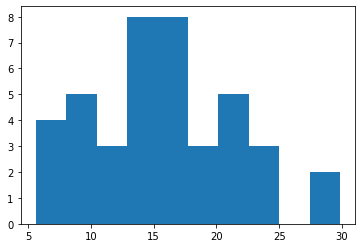

In [136]:
plt.hist(myendtimes)

In [137]:
myendtimes - estim_end_times

array([ 1.040000e-02,  1.632044e+01,  5.750000e-03,  1.804000e-02,
        3.345000e-02,  6.168000e-02,  6.100000e-03,  1.372000e-02,
        6.791000e-02,  7.137700e-01,  5.110000e-03,  2.300000e-01,
       -5.300000e-04, -3.421000e-02, -4.550000e-03,  2.687000e-02,
        4.753000e-02,  6.211900e-01,  8.760000e-03,  4.427570e+00,
       -5.011000e-01,  2.216100e-01,  4.160000e+00, -3.547000e-02,
        3.737000e-02,  7.000000e-03,  8.000000e-03,  2.000000e-02,
       -1.280000e-01,  4.000000e-02,  4.200000e-02,  2.320000e-01,
        1.322200e-01, -1.000000e-02,  4.000000e-02, -3.000000e-03,
        4.000000e-03, -2.109000e-02,  1.020000e-01,  6.000000e-03,
        2.300000e-02])

Text(0, 0.5, 'NumFiles')

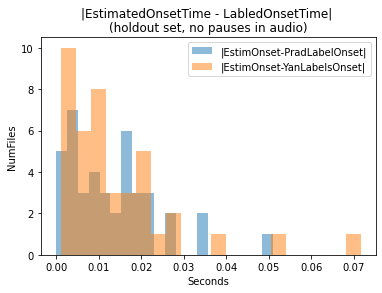

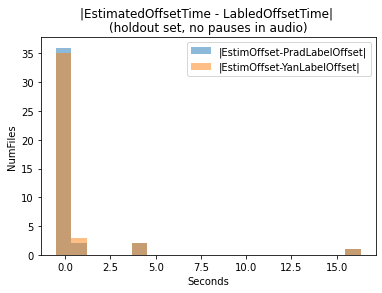

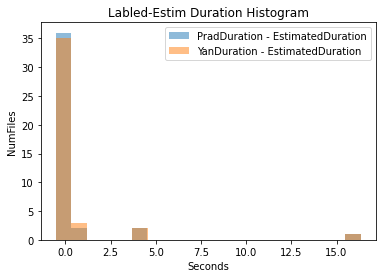

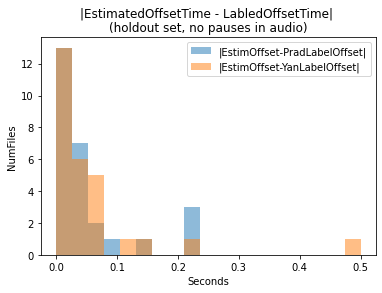

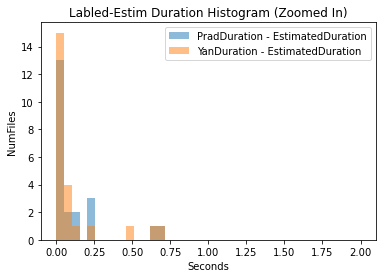

In [142]:
plt.figure()
plt.hist(np.abs(mystart_times - estim_start_times), alpha=.5, label='|EstimOnset-PradLabelOnset|', bins=20)
plt.hist(np.abs(yanstart_times - estim_start_times), alpha=.5, label='|EstimOnset-YanLabelsOnset|', bins=20)
plt.title('|EstimatedOnsetTime - LabledOnsetTime| \n(holdout set, no pauses in audio)')
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('NumFiles')

plt.figure()
plt.hist(myendtimes - estim_end_times, alpha=.5, label='|EstimOffset-PradLabelOffset|', bins=20)
plt.hist(yanendtimes - estim_end_times, alpha=.5, label='|EstimOffset-YanLabelOffset|', bins=20)
# plt.hist(mystart_times, alpha=.5)
plt.title('|EstimatedOffsetTime - LabledOffsetTime| \n(holdout set, no pauses in audio)')
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('NumFiles')

plt.figure()
plt.title('Labled-Estim Duration Histogram')
plt.hist(my_error, alpha=.5, label='PradDuration - EstimatedDuration', bins=20)
plt.hist(yan_error, alpha=.5, label='YanDuration - EstimatedDuration', bins=20)
# plt.hist(estim_end_times-estim_start_times, alpha=.5, label='Algo Estimated Duration', bins=20)
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('NumFiles')



plt.figure()
plt.hist(myendtimes - estim_end_times, alpha=.5, label='|EstimOffset-PradLabelOffset|', bins=np.linspace(0,.5, 20))
plt.hist(yanendtimes - estim_end_times, alpha=.5, label='|EstimOffset-YanLabelOffset|', bins=np.linspace(0,.5, 20))
# plt.hist(mystart_times, alpha=.5)
plt.title('|EstimatedOffsetTime - LabledOffsetTime| \n(holdout set, no pauses in audio)')
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('NumFiles')

plt.figure()
plt.title('Labled-Estim Duration Histogram (Zoomed In)')
plt.hist(my_error, alpha=.5, label='PradDuration - EstimatedDuration', bins=np.linspace(0, 2, 40))
plt.hist(yan_error, alpha=.5, label='YanDuration - EstimatedDuration', bins=np.linspace(0, 2, 40))

# plt.hist(my_error, alpha=.5, label='PradDuration - EstimatedDuration', bins=20)
# plt.hist(yan_error, alpha=.5, label='YanDuration - EstimatedDuration', bins=20)
# plt.hist(estim_end_times-estim_start_times, alpha=.5, label='Algo Estimated Duration', bins=20)
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('NumFiles')


In [105]:
print(sum(my_error<.55))
print(sum(my_error<.3))
print(sum(my_error<.1))
print(sum(my_error<.05))

36
36
31
29


In [104]:
print(sum(yan_error<.55))
print(sum(yan_error<.3))
print(sum(yan_error<.1))
print(sum(yan_error<.05))

36
35
33
29


Text(0, 0.5, 'NumFiles')

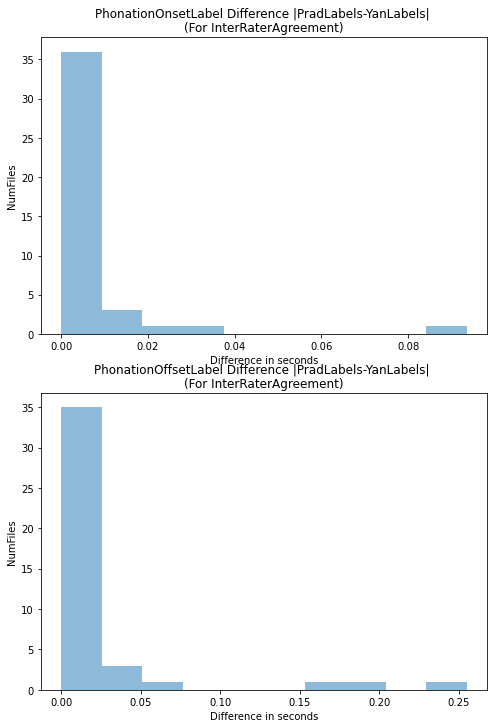

In [70]:
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.title('PhonationOnsetLabel Difference |PradLabels-YanLabels| \n(For InterRaterAgreement)')
plt.hist(np.abs(mystart_times - yanstart_times), alpha=.5)
plt.xlabel('Difference in seconds')
plt.ylabel('NumFiles')

plt.subplot(2,1,2)
plt.title('PhonationOffsetLabel Difference |PradLabels-YanLabels| \n(For InterRaterAgreement)')
plt.hist(np.abs(myendtimes - yanendtimes), alpha=.5)
plt.xlabel('Difference in seconds')
plt.ylabel('NumFiles')

In [120]:
error_end_inds = np.argwhere(myendtimes - estim_end_times>.25).ravel()
audio_files = np.array([os.path.join(phonation_dataset_path, tgfile.split('/')[-1].split('.')[0]+'.wav') for tgfile in tg_filenames])
end_error_audios = audio_files[error_end_inds]
print(len(end_error_audios))
end_error_audios

for ii, idx in enumerate(error_end_inds):
    print('----------------------------------------------------')
    print('Audiopath:\n', end_error_audios[ii])
    print('----- Estimated TG:-----\n', estimated_phone_dfs[idx])
    print('----- Manual TG: -----\n', manual_phone_dfs[idx])

6
----------------------------------------------------
Audiopath:
 /home/prad/datasets/phonation_data/5022-034098-02-20180808-1015-10.wav
----- Estimated TG:-----
        0      1      2
0   0.00   1.44  [SIL]
1   1.44  13.54     AA
2  13.54  13.74  [SIL]
3  13.74  29.84     AA
----- Manual TG: -----
           0         1      2
0   0.00000   1.43289  [SIL]
1   1.43289  29.86044     AA
2  29.86044  30.00000  [SIL]
----------------------------------------------------
Audiopath:
 /home/prad/datasets/phonation_data/1042-20180119-1030-7.wav
----- Estimated TG:-----
        0      1      2
0   0.00   2.98  [SIL]
1   2.98  15.33     AA
2  15.33  15.66  [SIL]
3  15.66  16.00     AA
4  16.00  17.67  [SIL]
----- Manual TG: -----
           0         1      2
0   0.00000   2.97687  [SIL]
1   2.97687  16.04377     AA
2  16.04377  30.00000  [SIL]
----------------------------------------------------
Audiopath:
 /home/prad/datasets/phonation_data/1039-20170919-2248-7.wav
----- Estimated TG:-----
  

In [125]:
import pandas as pd
import numpy as np
import os
from alignment_helper_fns import textgridpath_to_phonedf, get_all_textgrids_in_directory


df = pd.read_csv('./phone_annotations_prad.csv')
phonation_dataset_path = '/home/prad/datasets/phonation_data'
df = df[~pd.isna(df['start_time_groundtruth'])]
estimated_tgs_path = '/home/prad/github/charsiu/results/phonation_nopause_trained_frame'
manual_tgs_path = '/home/prad/datasets/phonation_data/extracted_manual_textgrids'
hold_out_inds = np.argwhere(df['RatePhonationStepPauseCount'].values>1).ravel()
# hold_out_inds = np.argwhere(df['RatePhonationStepPauseCount'].values)

df = df.reset_index()
df = df.iloc[hold_out_inds, :]
df = df[df['PradPause'].values>=0]
df = df[pd.isna(df['PradFlag'])]
df = df.reset_index()

# estimated_tgs = get_all_textgrids_in_directory('./results/phonation_baseline_frame')
tg_filenames = [sessid+'.TextGrid' for sessid in list(df['sessionStepId'].values)]
estimated_tgs = [os.path.join(estimated_tgs_path, tgfname) for tgfname in tg_filenames]
manual_tgs = [os.path.join(manual_tgs_path, tgfname) for tgfname in tg_filenames]
manual_phone_dfs = np.array([textgridpath_to_phonedf(tgpath, phone_key='phones', replace_silence=False) for tgpath in manual_tgs])
estimated_phone_dfs = np.array([textgridpath_to_phonedf(tgpath, phone_key='phones', replace_silence=False) for tgpath in estimated_tgs])
audio_files = [os.path.join(phonation_dataset_path, tgfile.split('/')[-1].split('.')[0]+'.wav') for tgfile in tg_filenames]
import traceback

manual_phone_dfs = []
estimated_phone_dfs = []
for ii in range(len(manual_tgs)):

    manual_tg = manual_tgs[ii]
    estimated_tg = estimated_tgs[ii]

    try:
        manual_phone_dfs.append(textgridpath_to_phonedf(manual_tg, phone_key='phones', replace_silence=False))
        estimated_phone_dfs.append(textgridpath_to_phonedf(estimated_tg, phone_key='phones', replace_silence=False))
    except Exception:
        print('-------------------------------------------------')
        print('Error with tg files:\t', manual_tg, estimated_tg)
        print('Audio:\t')
        print("They're probably empty")
        traceback.print_exc()

mystart_times = df['PradStart'].values
yanstart_times = df['start_time_groundtruth'].values
estim_start_times = np.array([edf.iloc[1,0] for edf in estimated_phone_dfs])

myendtimes = df['PradEnd'].values
yanendtimes = df['end_time_groundtruth'].values
estim_end_times = np.array([edf.iloc[2,0] for edf in estimated_phone_dfs])

mydurations = myendtimes - mystart_times
yandurations = yanendtimes - yanstart_times
estimdurations = estim_end_times - estim_start_times

my_error = mydurations - estimdurations
yan_error = yandurations - estimdurations




/home/prad/anaconda3/envs/alignment/lib/python3.7/site-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [128]:
error_end_inds = np.argwhere(myendtimes - estim_end_times>.1).ravel()
audio_files = np.array([os.path.join(phonation_dataset_path, tgfile.split('/')[-1].split('.')[0]+'.wav') for tgfile in tg_filenames])
end_error_audios = audio_files[error_end_inds]
print(len(end_error_audios))
end_error_audios

for ii, idx in enumerate(error_end_inds):
    print('----------------------------------------------------')
    print('Audiopath:\n', end_error_audios[ii])
    print('----- Estimated TG:-----\n', estimated_phone_dfs[idx])
    print('----- Manual TG: -----\n', manual_phone_dfs[idx])

4
----------------------------------------------------
Audiopath:
 /home/prad/datasets/phonation_data/5022-034098-02-20180808-1015-10.wav
----- Estimated TG:-----
        0      1      2
0   0.00   1.44  [SIL]
1   1.44  13.54     AA
2  13.54  13.74  [SIL]
3  13.74  29.84     AA
----- Manual TG: -----
           0         1      2
0   0.00000   1.43289  [SIL]
1   1.43289  29.86044     AA
2  29.86044  30.00000  [SIL]
----------------------------------------------------
Audiopath:
 /home/prad/datasets/phonation_data/1042-20180119-1030-7.wav
----- Estimated TG:-----
        0      1      2
0   0.00   2.98  [SIL]
1   2.98  15.33     AA
2  15.33  15.66  [SIL]
3  15.66  16.00     AA
4  16.00  17.67  [SIL]
----- Manual TG: -----
           0         1      2
0   0.00000   2.97687  [SIL]
1   2.97687  16.04377     AA
2  16.04377  30.00000  [SIL]
----------------------------------------------------
Audiopath:
 /home/prad/datasets/phonation_data/1039-20170919-2248-7.wav
----- Estimated TG:-----
  

In [ ]:
""" concatenation"""

In [87]:
print('Num estimated with more than 1 phone duration:\t ', sum([etg.shape[0]>3 for etg in estimated_phone_dfs]))

Num estimated with more than 1 phone duration:	  8
